#### 데이터 전처리

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
raw_data = pd.read_csv("C:/Users/Owner/Desktop/diversified_ecommerce_dataset.csv")

In [29]:
df = pd.DataFrame(raw_data)
df.head()

,Product ID,Product Name,Category,Price,Discount,Tax Rate,Stock Level,Supplier ID,Customer Age Group,Customer Location,Customer Gender,Shipping Cost,Shipping Method,Return Rate,Seasonality,Popularity Index
0,P6879,Jacket,Apparel,53.85,5,15,150,S535,35-44,"New York, USA",Male,23.32,Standard,4.49,Yes,56
1,P5132,Camera,Electronics,761.26,10,15,224,S583,25-34,"London, UK",Female,20.88,Overnight,16.11,No,79
2,P2941,Sneakers,Footwear,1756.76,5,8,468,S118,25-34,"Tokyo, Japan",Non-Binary,16.43,Standard,4.93,No,40
3,P8545,Cookbooks,Books,295.24,10,15,25,S104,18-24,"Paris, France",Female,27.49,Standard,1.31,No,93
4,P4594,Camera,Electronics,832.00,10,12,340,S331,55+,"Tokyo, Japan",Male,45.93,Overnight,4.37,No,56


### 데이터 이해

In [30]:
df.shape

(1000000, 16)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Product ID          1000000 non-null  object 
 1   Product Name        1000000 non-null  object 
 2   Category            1000000 non-null  object 
 3   Price               1000000 non-null  float64
 4   Discount            1000000 non-null  int64  
 5   Tax Rate            1000000 non-null  int64  
 6   Stock Level         1000000 non-null  int64  
 7   Supplier ID         1000000 non-null  object 
 8   Customer Age Group  1000000 non-null  object 
 9   Customer Location   1000000 non-null  object 
 10  Customer Gender     1000000 non-null  object 
 11  Shipping Cost       1000000 non-null  float64
 12  Shipping Method     1000000 non-null  object 
 13  Return Rate         1000000 non-null  float64
 14  Seasonality         1000000 non-null  object 
 15  Popularity Index

In [32]:
## 기술통계 확인
df.describe()

,Price,Discount,Tax Rate,Stock Level,Shipping Cost,Return Rate,Popularity Index
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1005.120742,12.516955,10.002052,250.028536,24.985224,10.492896,49.970211
std,574.451223,8.539929,3.406026,144.676275,14.431730,5.484849,29.164875
min,10.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,507.860000,5.000000,8.000000,125.000000,12.490000,5.740000,25.000000
50%,1005.430000,15.000000,10.000000,250.000000,24.970000,10.480000,50.000000
75%,1502.310000,20.000000,12.000000,375.000000,37.470000,15.250000,75.000000
max,2000.000000,25.000000,15.000000,500.000000,50.000000,20.000000,100.000000


In [33]:
df.isnull().sum()

Product ID            0
Product Name          0
Category              0
Price                 0
Discount              0
Tax Rate              0
Stock Level           0
Supplier ID           0
Customer Age Group    0
Customer Location     0
Customer Gender       0
Shipping Cost         0
Shipping Method       0
Return Rate           0
Seasonality           0
Popularity Index      0
dtype: int64

### 컬럼

Product ID: 각 제품의 고유 ID

Product name: 카탈로그그에 나열된 제품의 이름

category: 제품의 유형(예: 전자제품, 의류, 홈 데코)

price: 제품 가격(USD)

Discount: 제품에 적용된 할인

Tax Rate: 제품에 적용되는 세율

Stock Level: 현재 제품이 남아있는 갯수

supplier ID: 제품 공급업체의 ID

Customer Age Group: 제품을 자주 구매하는 고객 연령대(예: 청소년, 성인, 노인)

Customer Location: 고객의 지리적 위치(예: 국가, 주 또는 도시)

Customer Gender: 고객의 성별(예: 남성, 여성)

Shipping Cost: 제품을 배송하는 비용

Shipping Method: 배송하는데 사용한 방법(예: 스탠다드, 익스프레스, 오버나이트)

Return Rate: 제품의 반품 비율

Seasonality: 제품이 가장 인기 있는 계절(예: 겨울, 여름, 연중)

Popularity Index: 제품의 인기도를 나타낸 점수

In [34]:
numeric_cols = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_cols].corr()
key_features = correlation_matrix['Return Rate'].abs().sort_values(ascending=False).index[1:5]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.scatterplot(x=df[feature], y=df['Return Rate'], alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Scatter plot : {feature} vs Return Rate")

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

KeyError: 'Customer ID'

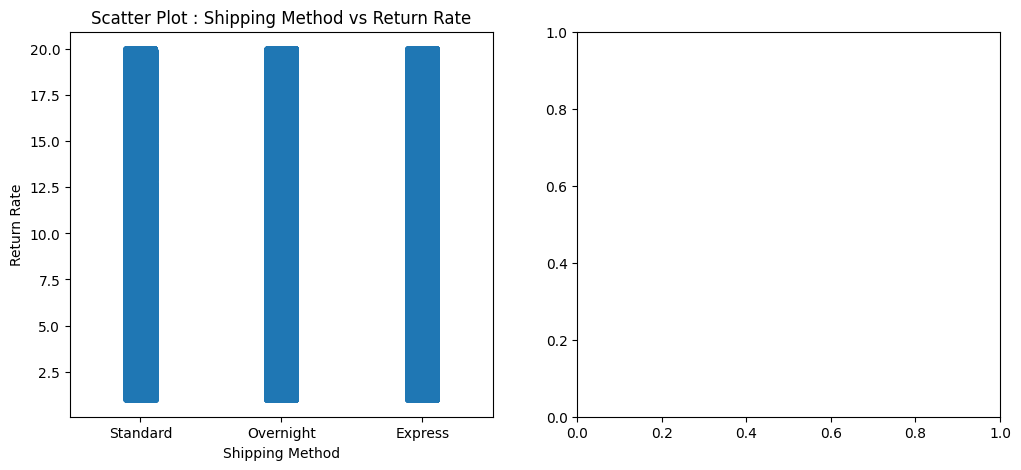

In [35]:
fit, axes = plt.subplots(1, 2, figsize=(12, 5))
                         
sns.stripplot(x=df['Shipping Method'], y=df['Return Rate'], data=df, jitter=True, ax=axes[0])
axes[0].set_title('Scatter Plot : Shipping Method vs Return Rate')

sns.stripplot(x=df['Customer ID'], y=df['Return Rate'], data=df, jitter=True, ax=axes[1])
axes[1].set_title('Scatter Plot : Customer ID vs Return Rate')

plt.tight_layout()
plt.show()

In [ ]:
# 카테고리형 변수 목록
categorical_columns = [ 'Category',
                       'Customer Age Group', 'Customer Location', 'Customer Gender',
                       'Shipping Method', 'Seasonality']

# 각 컬럼의 고유값 출력
print("\n카테고리형 변수의 고유값:")
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")


카테고리형 변수의 고유값:


KeyError: 'Category'

In [11]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

# 1. 라벨 인코딩: 여러 컬럼
le_category = LabelEncoder()
df['Category (Label Encoded)'] = le_category.fit_transform(df['Category'])

le_location = LabelEncoder()
df['Customer Location (Label Encoded)'] = le_location.fit_transform(df['Customer Location']) 

le_shipping = LabelEncoder()
df['Shipping Method (Label Encoded)'] = le_shipping.fit_transform(df['Shipping Method'])

le_seasonality = LabelEncoder()
df['Seasonality (Label Encoded)'] = le_seasonality.fit_transform(df['Seasonality'])

le_age_group = LabelEncoder()
df['Customer Age Group (Label Encoded)'] = le_age_group.fit_transform(df['Customer Age Group'])

# 2. 이진 인코딩: Customer Gender
if 'Customer Gender' in df.columns:  # 컬럼 존재 여부 확인
    binary_encoder = ce.BinaryEncoder(cols=['Customer Gender'])
    df = binary_encoder.fit_transform(df)
else:
    print("Customer Gender column is missing or already encoded.")

In [12]:
df = df.drop(columns=['Product ID']) 
df = df.drop(columns=['Supplier ID'])
df = df.drop(columns=['Product Name'])

# 원래 문자열 컬럼 삭제
df = df.drop(columns=['Category', 'Customer Age Group', 'Customer Location', 'Shipping Method', 'Seasonality'])

In [13]:
print(df.dtypes)

Price                                 float64
Discount                                int64
Tax Rate                                int64
Stock Level                             int64
Customer Gender_0                       int64
Customer Gender_1                       int64
Shipping Cost                         float64
Return Rate                           float64
Popularity Index                        int64
Category (Label Encoded)                int64
Customer Location (Label Encoded)       int64
Shipping Method (Label Encoded)         int64
Seasonality (Label Encoded)             int64
Customer Age Group (Label Encoded)      int64
dtype: object
